<a href="https://colab.research.google.com/github/skywalker0803r/pa_0510/blob/V3/notebook/lstsq_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
import pandas as pd
import numpy as np

df_path = '/content/drive/MyDrive/南亞PA廠/cleaned_data/train_cleaned.csv'
tag_path = '/content/drive/MyDrive/南亞PA廠/cleaned_data/tag_cleaned.csv'
df = pd.read_csv(df_path,index_col=0)
tag = pd.read_csv(tag_path,index_col=0)
tag.head()

,item,TAG,chinese,character,unit,category,period,min,max,推測顯著性(依製程經驗)
0,1.0,MLPAP_TJC-0627.PV,OX預熱器出口溫度,溫度,℃,可控制因子,1分鐘2筆,145,160,***
1,2.0,MLPAP_TRC-0610.PV,空氣預熱器出口溫度,溫度,℃,可控制因子,1分鐘2筆,160,200,***
2,3.0,MLPAP_FR-0632.PV,汽機風量,流量,KNM3/HR,可控制因子,1分鐘2筆,64,85.4,****
3,4.0,MLPAP_FQ-0619.PV,OX入料量,流量,kg/HR,可控制因子,1分鐘2筆,2000,8000,****
4,5.0,MLPAP_TJC-0757A.PV,反應槽鹽浴溫度,溫度,℃,可控制因子,1分鐘2筆,345,365,****


# INPUT

In [137]:
tag[tag.TAG.str.contains('0619.PV')]

,item,TAG,chinese,character,unit,category,period,min,max,推測顯著性(依製程經驗)
3,4.0,MLPAP_FQ-0619.PV,OX入料量,流量,kg/HR,可控制因子,1分鐘2筆,2000,8000,****


# OUTPUT

In [138]:
tag[tag.TAG.str.contains('0997.PV')]

,item,TAG,chinese,character,unit,category,period,min,max,推測顯著性(依製程經驗)
25,26.0,MLPAP_FQI-0997.PV,粗PA出料量,流量,KG/HR,不可控制因子,1分鐘2筆,2000,8800,***


# columns

In [139]:
x_col = tag[tag.TAG.str.contains('0619.PV')].TAG.tolist()
y_col = tag[tag.TAG.str.contains('0997.PV')].TAG.tolist()
x_col,y_col

(['MLPAP_FQ-0619.PV'], ['MLPAP_FQI-0997.PV'])

# visualization

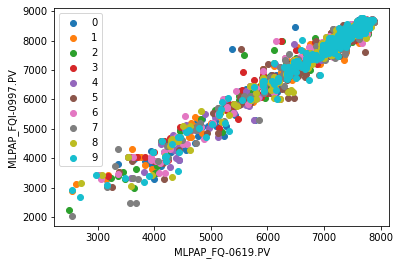

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in range(10):
  d = df.sample(1000,random_state=i)
  plt.scatter(d[x_col[0]].values,d[y_col[0]].values,label=str(i))
plt.xlabel(x_col[0])
plt.ylabel(y_col[0])
plt.legend()
plt.show()

In [141]:
from numpy.linalg import inv
from tqdm import tqdm_notebook as tqdm
w_list = []
b_list = []
for i in tqdm(range(1000)):
  d = df[x_col+y_col].dropna(axis=0).sample(1000,random_state=i)
  A = d[x_col]
  A['bias'] = 1
  A = A.values
  b = d[y_col].values
  w = inv(A.T@A)@A.T@b
  w_list.extend(w[0])
  b_list.extend(w[1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


1.1575996945283165


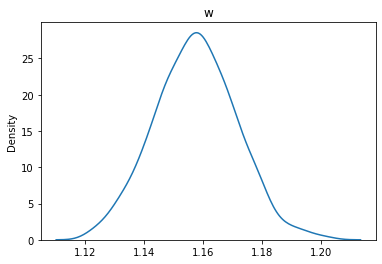

In [142]:
sns.kdeplot(w_list)
wm = np.mean(w_list)
plt.title('w')
print(wm)

-416.47623385366427


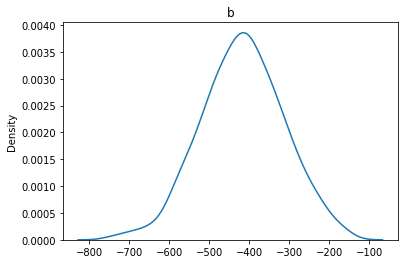

In [143]:
sns.kdeplot(b_list)
bm = np.mean(b_list)
plt.title('b')
print(bm)

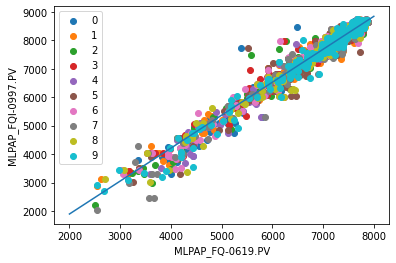

In [144]:
x = np.linspace(2000,8000,1000)
y = x*wm+bm
plt.plot(x,y)
for i in range(10):
  d = df.sample(1000,random_state=i)
  plt.scatter(d[x_col[0]].values,d[y_col[0]].values,label=str(i))
plt.xlabel(x_col[0])
plt.ylabel(y_col[0])
plt.legend()
plt.show()

# class F

In [147]:
class F(object):
  def __init__(self,w,b):
    self.w = w
    self.b = b
  def __call__(self,x):
    return x*self.w+self.b

f = F(wm,bm)
d = df[x_col+y_col].dropna(axis=0).sample(1000)
x = d[x_col[0]].values
y = d[y_col[0]].values
y_hat = f(x)

from sklearn.metrics import r2_score
r2_score(y,y_hat)

0.9727951406670563